# Solving ABHI economy (Aiyagari, 1994)
#### Using Endogenous Grid Method (Carroll, 2006)
---


## The model

Consider a closed economy with ex-ante identical households that - conditional on the
states $(a, z)$ - solve the same recursive problem:

<a id='equation-vf'></a>
$$V(a, z) = \max_{c,h,a'} u(c) − v(h) + \beta E[V(a', z')] \tag{1}$$
<a id='equation-budget-constraint'></a>
$$s.t \quad c + a' = (1 + r)a + hwz \tag{2}$$
<a id='equation-borrowing-constraint'></a>
$$a' \geq −b \tag{3}$$
<a id='equation-nonneg-constraint'></a>
$$c \geq 0, \quad h \geq 0 \tag{4}$$

where $s$ is individual consumption, $a$ asset holdings, $h$ labor supply, and $z$ can be interpreted as an idiosyncratic productivity shock that follows a stochastic Markov process with transition probability matrix, $\Pi(z)$, and realizations drawn from the finite valued set $Z$. The parameters are restricted to be, $0 < \beta < 1$ (subjective discount factor)
and $b ≥ 0$ (borrowing constraint), and the efficiency wage $w > 0$ as well as the interest
rate $r > 0$ are determined in the competitive production sector. What makes households ex-post heterogeneous is that each of them draws an individual-specific productivity realization $z'$ from the same distribution, and since financial markets are incomplete (there is only a risk-free asset available, but no state-contingent assets) agents with different shock histories will be different ex post.

First order conditions are:

$$u'(c) - \lambda = 0 $$
$$-v(h) + \lambda zw = 0$$
$$\beta E[V'(a',z')] - \lambda + \mu = 0$$
$$\mu(a' +b) = 0, \quad \mu \geq 0 $$
$$V'(a,z) = \lambda(1+r)$$
$$(1+r)a + hzw -c - a' = 0$$

where $\lambda$ is the Lagrange multiplier associated with the budget constraint [(2)](#equation-budget-constraint) and $\mu$ is the Lagrange multiplier associated with the borrowing constraint [(3)](#equation-borrowing-constraint). Given standard assumptions on $u(c)$ and $v(c)$ we can ignore the positivity constraints [(4)](#equation-nonneg-constraint).

Eliminating $\lambda$, the Envelope condition yields the following set of optimal conditions:

$$v'(h) = u'(c)zw$$
$$u'(c) = \beta E[u'(c')(1+r)] + \mu$$
$$\mu(a' + b) = 0, \quad \mu \geq 0$$
$$a' = (1+r)a + hzw - c$$

Guess a decision rule for the optimal consumption as a function of the future states, 

$$c_{0}(a',z')$$ 

Let the future asset level be consistent with a non-binding borrowing constraint, $a' \geq -b$ and the shock realizations be drawn from the finite valued set, $Z = \{z_{1}, ..., z_{N}\}$, with transition probabilities defined by $\pi_{s'|s}$.

<div class="alert alert-block alert-warning">
Denote the inverse marginal utility function of consumption by $(u')^{-1}$. Define the function $\mathcal{C}(a',z)$, that measures the current consumption level as a function of the future state, $a'$, the current state, $z$, and the guess, $c_{0}(a',z')$, if the borrowing constraint is not binding, $\mu = 0$:

<a id='equation-cons-optimal'></a>
$$\mathcal{C}(a',z) = (u')^{-1}(\beta(1+r)E[u'(c_{0}(a',z'))]) \tag{5}$$
</div>

<div class="alert alert-block alert-warning">
Denote the inverse function of the marginal disutility of labor be denoted by $(v')^{-1}$. We can characterize the optimal labor supply as a function of the optimal consumption and the productivity realization:

<a id='equation-labor-optimal'></a>
$$\mathcal{H}(\mathcal{C}(a',z),z) = (v')^{-1}(u'(\mathcal{C}(a',z))zw) \tag{6}$$
</div>

Now we can find the current asset level $\mathcal{A}(a',z)$ that is consistent with the guess of the consumption decision rule. Or, on other words, $\mathcal{A}(a',z)$ defines the current assets holdings for a household with labor productivity, $z$, who has chosen to save $a'$ for tomorrow. From the budget constraint we can derive:

<a id='equation-assets-optimal'></a>
$$\mathcal{A}(a',z) = \frac{1}{1+r}[\mathcal{C}(a',z) + a' - \mathcal{H}(\mathcal{C}(a',z),z)zw] \tag{7}$$

The pair of functions $\{\mathcal{C}(a',z), \mathcal{A}(a',z)\}$ implicitly defines a relationship between current consumption, $c$, and the current asset level and productivity realization, $(a,z)$, given that the borrowing constraint does not bind, $\mu=0$. Thus, the guess on the consumption function can be updated by simply interpolating $c_{0}(\mathcal{A}(a',z),z)$ on $(a', y')$ to yield

<a id='equation-cons-nb'></a>
$$c^{nb}_{1}(a',z'), \quad a' > \mathcal{A}(-b,z) \tag{8}$$

For future asset levels $a'$ that are smaller than the lowest current asset level that is exactly consistent with a binding borrowing constraint in the future $a' < \mathcal{A}(-b,z) $.

The procedure in this case is different: for those asset levels, we update the consumption function with the value consistent with a binding borrowing constraint, that is, $a' = -b$. Using the budget constraint we solve

<a id='equation-bc-binding'></a>
$$c^{b}_{1}(a,z) = (1+r)a + \mathcal{H}(c^{'}_{b}(a,z),z)zw + b \tag{9}$$

to find the consumption consistent with the binding borrowing constraint. This is one equation with only one unknown, $c^{b}_{1}(a,z)$, so we can use a root solver to find the optimal level of consumption, then we iterate one period forward to yield 

<a id='equation-cons-b'></a>
$$c^{b}_{1}(a',z'), \quad a' < \mathcal{A}(-b,z) \tag{10}$$

Finally then we have:
<a id='equation-cons-update'></a>
$$
c_{1}(a',z') =
\begin{cases}
c^{b}_{1}(a',z'), \quad a' < \mathcal{A}(-b,z), \\
c^{nb}_{1}(a',z'), \quad a' > \mathcal{A}(-b,z)
\end{cases}
\tag{11}
$$

Now that we have the optimal consumption policy we can simulate this economy over $T=10^4$ periods for the given guess on the prices, $r_{0}$ and $w_{0}$, using the budget constraint [(2)](#equation-budget-constraint). Given a sequence $z_{t} = \{z_{0}, ..., z_{T}\}$ simulated using the Markov Chain, we will obtain sequences of $a_{t} = \{a_{0}, ..., a_{T}\}$ and $h_{t} = \{h_{0}, ..., h_{T}\}$ from where we can compute aggregate levels of capital, $K$, and labor supply, $L$.

<a id='equation-K'></a>
$$K_{1} = \frac{1}{T}\sum_{t=1}^{T}a_{t}(r_{0}) \tag{12}$$
<a id='equation-L'></a>
$$L_{1} = \frac{1}{T}\sum_{t=1}^{T}h_{t}(r_{0})z_{t} \tag{13}$$

Then we can update $\{r_{1}$, $w_{1}\}$ according to marginal pricing in a Cobb-Douglas production sector, $F(K,L) = K^{\alpha}L^{1-\alpha}$,

<a id='equation-r'></a>
$$r_{1} = \alpha\left(\frac{K_{1}}{L_{1}}\right)^{\alpha-1} - \delta \tag{14}$$

<a id='equation-w'></a>
$$w_{1} = (1-\alpha)\left(\frac{\alpha}{r_{1}+\delta}\right)^{\alpha/(1-\alpha)} \tag{15}$$

and iterate until convergence.

### The algorithm

1. Guess $\{r_{0}, w_{0}\}$:
    1. Guess $c_{0}(a',z')$.
    2. Use $c_{0}(a',z')$ to solve for $\mathcal{C}(a',z)$ using the Euler equation [(5)](#equation-cons-optimal).
    3. Use $\mathcal{C}(a',z)$ to solve for $\mathcal{H}(c,z)$ using the first order condition for optimal labor supply  [(6)](#equation-labor-optimal).
    4. Use $c_{0}(a',z')$, $\mathcal{C}(a',z)$ and $\mathcal{H}(c,z)$ to solve for $\mathcal{A}(a',z)$ using the budget constraint [(7)](#equation-assets-optimal).
    5. Interpolate $c_{0}(\mathcal{A}(a',z),z)$ on $(a', y')$ to update $c_{1}(a',z')$.
    6. Check convergence:
    $$ \left\lVert\frac{c_{1}(A,Z) - c_{0}(A,Z)}{c_{0}(A,Z)}\right\rVert \leq 10^{-5}$$
    If true STOP, save $c^{*}_{r0}(A,Z)$ and continue to STEP 2, otherwise set $c_{0}(a',z') = c_{1}(a',z')$ and go to STEP A.
2. Given $c^{*}_{r0}(A,Z)$ simulate the economy and obtain $\{K_{1}, L_{1}\}$ according to [(12)](#equation-K) and [(13)](#equation-L).
3. Use $K_{1}$ and $L_{1}$ to obtain $\{r_{1}, w_{1}\}$ according to [(14)](#equation-r) and [(15)](#equation-w).
4. Check convergence:
$$\left\lVert \frac{r_{1} - r_{0}}{r_{0}} \right\rVert \leq 10^{-5}$$
If true STOP, save $r^{*}$ and exit the algorithm, otherwise set $r_{0} = r_{1}$, $w_{0} = w_{1}$ and go to STEP 1.


---
## Solving the model

In [1]:
using Parameters, QuantEcon, LinearAlgebra, Interpolations, Random, Roots, Optim, Plots

We start by defining a `NamedTuple` object type called `Household` that contains all the parameters and functions needed to solve the model.

In [2]:
Household = @with_kw (r = 0.02,
                      R = 1 + r,
                      α = 0.33,
                      δ = 0.05,
                      w = (1-α)*(α/(r+δ))^(α/(1-α)),
                      σ = 2.0,
                      κ = 4.00,
                      ν = 0.25,
                      β = 0.96,
                      MC = MarkovChain([0.5 0.5; 0.5 0.5], [0.95; 1.05]),
                      Π = MC.p,
                      z_vals = MC.state_values,
                      z_size = length(z_vals),
                      b = 0.0, # Borrowing limit/Minimum level of assets
                      r_ss = (1/β-1), # SS interest rate
                      a_max = ((r_ss+δ)/α)^(1/(α-1))*3, # 3 times SS capital
                      a_size = 200,
                      a_vals = collect(range(b, a_max, length = a_size)),
                      u = σ == 1 ? (x, h=0.0) -> log(x)-  κ*(h^(1+ν))/(1+ν) : (x, h=0.0) -> (x^(1 - σ) - 1) / (1 - σ) - κ*(h^(1+ν))/(1+ν),
                      duc = c -> c^(-σ),
                      duh = h -> κ*h^(ν),
                      duc_inv = x -> x^(-1/σ),
                      duh_inv = x -> (x/κ)^(1/ν))

#3 (generic function with 2 methods)

We need a function that initializes our initial guess $c_{0}(a',z')$ given some `Household` parameters.

In [3]:
function initialize(am::NamedTuple)
    # simplify names, set up arrays
    @unpack R, r, w, b, σ, β, Π, z_vals, a_size, a_vals, z_size, duc, duh, duc_inv, duh_inv, u = am
    V0 = zeros(Float64, a_size, z_size)
    c0 = zeros(Float64, a_size, z_size)
    a0 = [a_vals a_vals]
    h0 = zeros(Float64, a_size, z_size)

    # Populate V and c
    for (i_z, z) in enumerate(z_vals)
        for (i_a, a) in enumerate(a_vals)
            c_max = R * a + w*z + b
            c0[i_a, i_z] = c_max
            V0[i_a, i_z] = u(c_max) / (1 - β)
        end
    end
    return V0, a0, c0, h0
end

initialize (generic function with 1 method)

Then we define the Endogenous Grid Method Operator function `EGMOperator_Labor` that solves for $c_{1}(a',z')$ using `g_c` ($c_{0}(a',z')$) and `am`(`Household`) as inputs. Therefore, this function runs steps (A)-(E) of the solution algorithm.

In [4]:
function EGMOperator_Labor(g_c::AbstractArray,
                            am::NamedTuple;
                            return_policy::Bool=false)
    @unpack R, r, w, b, σ, β, Π, z_vals, a_size, a_vals, z_size, duc, duh, duc_inv, duh_inv, u = am
    # Initialize arrays
    g_a = zeros(Float64, a_size, z_size)
    g_c_nb = zeros(Float64, a_size, z_size)
    g_c_new = zeros(Float64, a_size, z_size)
    
    # Iterate over different combinations of (a',z)
    for (i_z, z) in enumerate(z_vals)
        for (i_a, a_new) in enumerate(a_vals)
            # Solve for C(a',z) in the no binding case
            expectation = dot(duc.(g_c[i_a, :]), Π[i_z, :])
            g_c_nb[i_a, i_z] = duc_inv(R*β * expectation)
            # Solve for H(c,z)
            h = duh_inv(w*z*duc_inv(g_c_nb[i_a, i_z]))
            # Solve for A(a',z)
            g_a[i_a, i_z] = (g_c_nb[i_a, i_z] + a_new - h*w*z) /R
        end
        # Update to c1(a',z')
        g_c_new[:, i_z] = LinearInterpolation(g_a[:,i_z], g_c_nb[:,i_z], extrapolation_bc=Line())(a_vals)
    end
    
    # Iterate over different combinations of (a',z)
    for (i_a, a_new) in enumerate(a_vals)
        for (i_z, z) in enumerate(z_vals)
            # Check if it is a binding borrowing constraint case
            if a_new < g_a[1, i_z]
                # If so, solve for C(a',z) using a root finder and use the result value in c1(a',z')
                cf = c -> abs(a_new*R + duh_inv(w*z*duc_inv(c))*w*z + b - c)
                res = optimize(cf, 0.0, g_c_new[i_a, i_z])
                g_c_new[i_a, i_z] = Optim.minimizer(res)
            end
        end
    end
    # Return c1(a',z')
    return g_c_new
end

EGMOperator_Labor (generic function with 1 method)

Now we can initialize our `Household` object with the desired parametrization, run `initialize` to obtain our initial guess $c_{0}(a',z')$ and iterate over `EGMOperator_Labor` using `compute_fixed_point` from `QuantEcon` library until convergence is reached.

Compute iterate 100 with error 8.472961688488212e-6
Converged in 100 steps


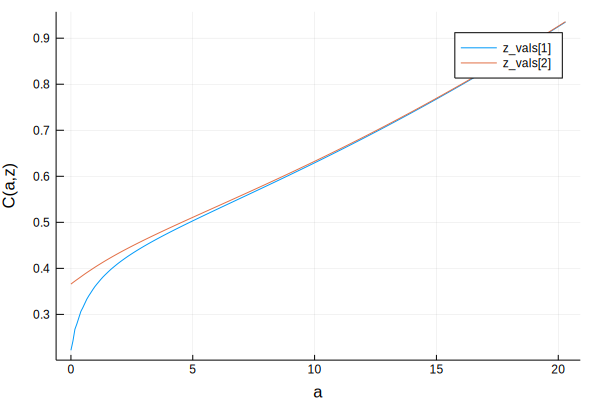

In [5]:
am = Household(r = 0.03,
                      α = 0.33,
                      δ = 0.05,
                      σ = 1.0,
                      κ = 4.00,
                      ν = 0.25,
                      β = 0.96,
                      MC = MarkovChain([0.6 0.4; 0.4 0.6], [0.5; 1.0]),
                      b = 0.0,
                      #a_max = 18,
                      a_size = 250)

@unpack R, α, δ, r, r_ss, w, b, σ, β, Π, z_vals, a_size, a_vals, z_size, duc, duh, duc_inv, duh_inv, u = am
V, g_a, g_c, g_h = initialize(am)

g_c = compute_fixed_point(c -> EGMOperator_Labor(c, am),
                        g_c,
                        max_iter=1000,
                        err_tol=1e-5,
                        verbose=2,
                        print_skip = 100)

plot(am.a_vals, g_c, label=["z_vals[1]", "z_vals[2]"], xlabel="a", ylabel="C(a,z)")

Given the new $c_{1}(a',z')$ we can simulate the economy and compute aggregate levels of $K_{1}$ and $L_{1}$. To implement this we define `SimulationAssets` function, which given some `Household` object and the correspondent `g_c`($c_{1}(a',z')$) from the previous step, returns a sequence $\{a_{t}\}_{t=0}^{T}$, $K_{1}$, $L_{1}$ and $r_{1}$.

Given r0 = 0.03, then K = 1.1030505493310432 and L = 0.5139843767370157, which implies r1 = 0.1478387944155487
Diff = 3.9279598138516234


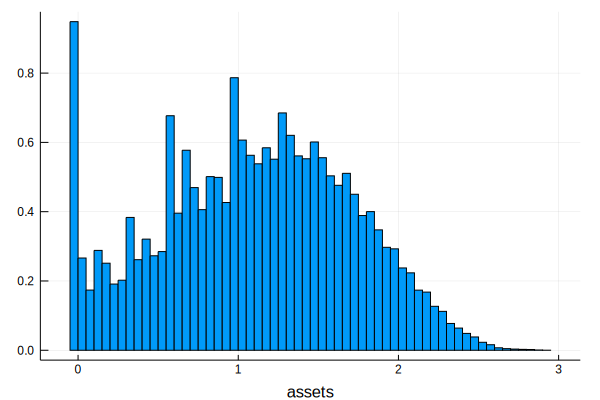

In [6]:
function SimulationAssets(am::NamedTuple,
                    g_c::AbstractArray,
                    T::Int = 100000;
                    labor::Bool = false,
                    verbose::Bool = false)

    @unpack Π, r, w, α, δ, a_vals, z_vals, R, duc_inv, duh_inv = am  # Simplify names

    cf = interp(a_vals, g_c)

    a_sim = zeros(Float64, T + 1)
    h_sim = zeros(Float64, T)
    z_sim = simulate(MarkovChain(Π), T)
    for t in 1:T
        i_z = z_sim[t]
        z = z_vals[i_z]
        if labor
            h_sim[t] = duh_inv(w*z*duc_inv(cf(a_sim[t], i_z)))
            a_sim[t+1] = R * a_sim[t] + h_sim[t]*w*z - cf(a_sim[t], i_z)
        else
            a_sim[t+1] = R * a_sim[t] + w*z - cf(a_sim[t], i_z)
        end
    end
    # Burn 1000 first periods
    a_sim = a_sim[1000:end]

    # Compute Aggregates from market clearin
    K = mean(a_sim)
    L = mean(z_sim.*h_sim)
    r_new = α*(K/L)^(α-1) - δ
    return a_sim, K, L, r_new
end

Random.seed!(42)
a_sim, K, L, r1 = SimulationAssets(am, g_c, labor = true)
residual = (r1 - r)/r
println("Given r0 = $r, then K = $K and L = $L, which implies r1 = $r1")
println("Diff = $residual")
histogram(a_sim, nbins = 100, leg = false, normed = true, xlabel = "assets")

As we can see the distance is quite large so we have to keep iterating over $r$ until convergence. The following function `SolveEquilibirum` does all the job. Here we use the root finding routine `find_zero` to find the $r$ that clears the market.

In [7]:
function SolveEquilibrium(r0; verbose=false)
    am = Household(r = r0,
                          α = 0.33,
                          δ = 0.05,
                          σ = 1.0,
                          κ = 4.00,
                          ν = 0.25,
                          β = 0.96,
                          MC = MarkovChain([0.6 0.4; 0.4 0.6], [0.5; 1.0]),
                          b = 0.0,
                          #a_max = 18,
                          a_size = 250)

    @unpack R, α, δ, r, r_ss, w, b, σ, β, Π, z_vals, a_size, a_vals, z_size, duc, duh, duc_inv, duh_inv, u = am
    V, g_a, g_c, g_h = initialize(am)


    g_c = compute_fixed_point(c -> EGMOperator_Labor(c, am),
                            g_c,
                            max_iter=1000,
                            err_tol=1e-4,
                            verbose=false,
                            print_skip = 100)
    
    Random.seed!(42) 
    a_sim, K, L, r1 = SimulationAssets(am, g_c, labor=true)
    residual = (r1 - r0)/r0
    if verbose
        println("Solving Aiyagari Model for r = $r:")
        println("Endogeous Grid Method. Grid size = $a_size")
        println("Given r0 = $r0, then K = $K and L = $L, which implies r1 = $r1")
        println("Diff = $residual")
        println("Check Incomplete Markets theory : r = $r1 < r_ss = $r_ss")
    end
    return residual, am, a_sim, g_c
end

r_star = find_zero(SolveEquilibrium, (0.01, 0.05), verbose=true)

Results of univariate zero finding:

* Converged to: 0.040382027481848166
* Algorithm: Roots.BisectionExact()
* iterations: 53
* function evaluations: 55
* stopped as x_n ≈ x_{n-1} using atol=xatol, rtol=xrtol
* Note: Change of sign at xn identified. 

Trace:
(a_0, b_0) = ( 0.0100000000000000,  0.0500000000000000)
(a_1, b_1) = ( 0.0225000000000000,  0.0500000000000000)
(a_2, b_2) = ( 0.0318750000000000,  0.0500000000000000)
(a_3, b_3) = ( 0.0318750000000000,  0.0409375000000000)
(a_4, b_4) = ( 0.0364062500000000,  0.0409375000000000)
(a_5, b_5) = ( 0.0386718750000000,  0.0409375000000000)
(a_6, b_6) = ( 0.0398046875000000,  0.0409375000000000)
(a_7, b_7) = ( 0.0403710937500000,  0.0409375000000000)
(a_8, b_8) = ( 0.0403710937500000,  0.0406542968750000)
(a_9, b_9) = ( 0.0403710937500000,  0.0405126953125000)
(a_10, b_10) = ( 0.0403710937500000,  0.0404418945312500)
(a_11, b_11) = ( 0.0403710937500000,  0.0404064941406250)
(a_12, b_12) = ( 0.0403710937500000,  0.0403887939453125)
(a_13,

0.040382027481848166

Solving Aiyagari Model for r = 0.040382027481848166:
Endogeous Grid Method. Grid size = 250
Given r0 = 0.040382027481848166, then K = 2.9522455057787984 and L = 0.42726953895379816, which implies r1 = 0.040382027481843746
Diff = -1.094565006369663e-13
Check Incomplete Markets theory : r = 0.040382027481843746 < r_ss = 0.04166666666666674


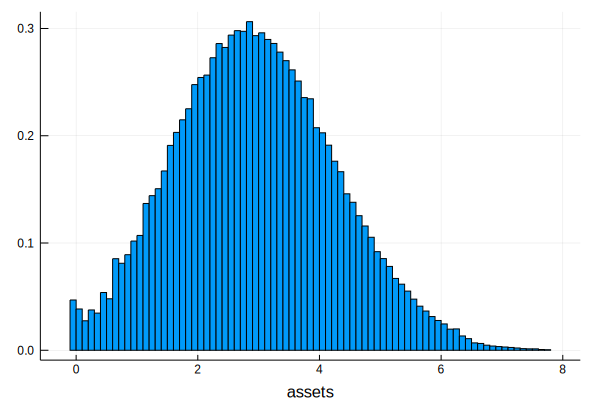

In [8]:
_, am, a_sim, g_c = SolveEquilibrium(r_star, verbose=true)
histogram(a_sim, nbins = 100, leg = false, normed = true, xlabel = "assets")

# Test different solution methods

In [9]:
include("../src/amObjects.jl")

using BenchmarkTools

# Create an instance of Household
am = Household(r = 0.03, β = 0.96, a_size = 250)
a_size = am.a_size
V, g_a, g_c, g_h = initialize(am)

println("===============")
println("TIME:")
println("===============")
println("VFI - Discrete with no refinements. Grid size = $a_size")
@btime compute_fixed_point(v -> BruteForce_Std(v, am),
                        V,
                        max_iter=1000,
                        err_tol=1e-4,
                        verbose=false)
println("===============")
println("VFI - Discrete using Monotonicity. Grid size = $a_size")
@btime compute_fixed_point(v -> BruteForce_Mtcy(v, am),
                        V,
                        max_iter=1000,
                        err_tol=1e-4,
                        verbose=false)
println("===============")
println("VFI - Continous using linear interpolation. Grid size = $a_size")
@btime compute_fixed_point(v -> BellmanOperator(v, am),
                        V,
                        max_iter=1000,
                        err_tol=1e-4,
                        verbose=false)
println("===============")
println("PFI - Continous using linear interpolation. Grid size = $a_size")
@btime compute_fixed_point(c -> ColemanOperator(c, am),
                        g_c,
                        max_iter=1000,
                        err_tol=1e-4,
                        verbose=false)
println("===============")
println("Endogeous Grid Method. Grid size = $a_size")
@btime compute_fixed_point(c -> EGMOperator_Labor(c, am),
                        g_c,
                        max_iter=1000,
                        err_tol=1e-4,
                        verbose=false)

TIME:
VFI - Discrete with no refinements. Grid size = 250
  2.817 s (35146794 allocations: 3.61 GiB)
VFI - Discrete using Monotonicity. Grid size = 250
  587.183 ms (3903170 allocations: 832.90 MiB)
VFI - Continous using linear interpolation. Grid size = 250
  5.738 s (137868308 allocations: 2.52 GiB)
PFI - Continous using linear interpolation. Grid size = 250
  2.203 s (61773231 allocations: 1.18 GiB)
Endogeous Grid Method. Grid size = 250
  18.344 ms (532327 allocations: 18.64 MiB)


250×2 Array{Float64,2}:
 0.421958  0.466375
 0.434558  0.470977
 0.442106  0.474761
 0.447854  0.478101
 0.452835  0.481159
 0.457248  0.484026
 0.461303  0.486748
 0.465052  0.489349
 0.468567  0.491854
 0.471894  0.494281
 0.475069  0.496642
 0.478115  0.498948
 0.481051  0.501205
 ⋮                 
 0.956877  0.958504
 0.959367  0.96098 
 0.961862  0.963462
 0.964363  0.96595 
 0.966868  0.968442
 0.969379  0.97094 
 0.971895  0.973443
 0.974417  0.975952
 0.976944  0.978467
 0.979476  0.980987
 0.982014  0.983512
 0.984557  0.986044